In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('data/quality_elo_updated.csv')
data = data.drop('Unnamed: 0',axis=1)
data

,match_id,player1,player2,elapsed_time,set_no,game_no,point_no,p1_sets,p2_sets,p1_games,...,rally_count,speed_mph,serve_width,serve_depth,return_depth,player1_quality,player2_quality,elo1,elo2,predicted_point_victor
0,2023-wimbledon-1301,Carlos Alcaraz,Nicolas Jarry,00:00:00,1,1,1,0,0,0,...,2,95.0,BC,NCTL,ND,2.95,1.3,1781.335773,1136.779506,1
1,2023-wimbledon-1301,Carlos Alcaraz,Nicolas Jarry,00:00:38,1,1,2,0,0,0,...,1,118.0,B,CTL,ND,2.95,1.3,1742.291141,1175.824138,1
2,2023-wimbledon-1301,Carlos Alcaraz,Nicolas Jarry,00:01:01,1,1,3,0,0,0,...,4,120.0,B,NCTL,D,2.95,1.3,1743.768705,1174.346574,1
3,2023-wimbledon-1301,Carlos Alcaraz,Nicolas Jarry,00:01:31,1,1,4,0,0,0,...,13,130.0,BW,CTL,D,2.95,1.3,1705.222252,1212.893027,1
4,2023-wimbledon-1301,Carlos Alcaraz,Nicolas Jarry,00:02:21,1,1,5,0,0,0,...,1,112.0,W,NCTL,NaN,2.95,1.3,1707.442667,1210.672612,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7279,2023-wimbledon-1701,Carlos Alcaraz,Novak Djokovic,04:39:58,5,10,330,2,2,5,...,11,123.0,C,NCTL,D,6.00,1.5,1854.822193,1926.513580,1
7280,2023-wimbledon-1701,Carlos Alcaraz,Novak Djokovic,04:40:43,5,10,331,2,2,5,...,5,114.0,W,NCTL,ND,6.00,1.5,1878.891490,1902.444283,1
7281,2023-wimbledon-1701,Carlos Alcaraz,Novak Djokovic,04:41:20,5,10,332,2,2,5,...,4,124.0,W,NCTL,D,6.00,1.5,1900.245225,1881.090548,1
7282,2023-wimbledon-1701,Carlos Alcaraz,Novak Djokovic,04:41:52,5,10,333,2,2,5,...,1,130.0,C,NCTL,D,6.00,1.5,1879.143709,1902.192064,1


In [3]:
data.columns

Index(['match_id', 'player1', 'player2', 'elapsed_time', 'set_no', 'game_no',
       'point_no', 'p1_sets', 'p2_sets', 'p1_games', 'p2_games', 'p1_score',
       'p2_score', 'server', 'serve_no', 'point_victor', 'p1_points_won',
       'p2_points_won', 'game_victor', 'set_victor', 'p1_ace', 'p2_ace',
       'p1_winner', 'p2_winner', 'winner_shot_type', 'p1_double_fault',
       'p2_double_fault', 'p1_unf_err', 'p2_unf_err', 'p1_net_pt', 'p2_net_pt',
       'p1_net_pt_won', 'p2_net_pt_won', 'p1_break_pt', 'p2_break_pt',
       'p1_break_pt_won', 'p2_break_pt_won', 'p1_break_pt_missed',
       'p2_break_pt_missed', 'p1_distance_run', 'p2_distance_run',
       'rally_count', 'speed_mph', 'serve_width', 'serve_depth',
       'return_depth', 'player1_quality', 'player2_quality', 'elo1', 'elo2',
       'predicted_point_victor'],
      dtype='object')

In [4]:
data = data.drop(['p1_sets','p2_sets','p1_games','p2_games','p1_score','p2_score', 'p1_points_won',\
       'p2_points_won','serve_width', 'serve_depth', 'return_depth', 'player1_quality', 'player2_quality', \
        'elo1', 'elo2', 'predicted_point_victor','speed_mph', 'winner_shot_type'],axis=1)

In [5]:
data.columns

Index(['match_id', 'player1', 'player2', 'elapsed_time', 'set_no', 'game_no',
       'point_no', 'server', 'serve_no', 'point_victor', 'game_victor',
       'set_victor', 'p1_ace', 'p2_ace', 'p1_winner', 'p2_winner',
       'p1_double_fault', 'p2_double_fault', 'p1_unf_err', 'p2_unf_err',
       'p1_net_pt', 'p2_net_pt', 'p1_net_pt_won', 'p2_net_pt_won',
       'p1_break_pt', 'p2_break_pt', 'p1_break_pt_won', 'p2_break_pt_won',
       'p1_break_pt_missed', 'p2_break_pt_missed', 'p1_distance_run',
       'p2_distance_run', 'rally_count'],
      dtype='object')

In [6]:
grouped = data.groupby('match_id').agg({
    'p1_ace': 'mean',
    'p2_ace': 'mean',
    'p1_winner': 'mean',
    'p2_winner': 'mean', 
    'p1_double_fault': 'mean',
    'p2_double_fault': 'mean',
    'p1_unf_err': 'mean',
    'p2_unf_err': 'mean',
    'p1_net_pt': 'mean',
    'p2_net_pt': 'mean',
    'p1_break_pt': 'mean',
    'p2_break_pt': 'mean',
})
grouped

,p1_ace,p2_ace,p1_winner,p2_winner,p1_double_fault,p2_double_fault,p1_unf_err,p2_unf_err,p1_net_pt,p2_net_pt,p1_break_pt,p2_break_pt
match_id,,,,,,,,,,,,
2023-wimbledon-1301,0.040000,0.050000,0.136667,0.160000,0.023333,0.010000,0.100000,0.153333,0.083333,0.176667,0.046667,0.023333
2023-wimbledon-1302,0.059701,0.074627,0.169154,0.179104,0.004975,0.014925,0.114428,0.109453,0.164179,0.074627,0.004975,0.024876
2023-wimbledon-1303,0.037313,0.097015,0.104478,0.246269,0.007463,0.022388,0.164179,0.104478,0.156716,0.082090,0.000000,0.067164
2023-wimbledon-1304,0.020772,0.056380,0.136499,0.181009,0.000000,0.026706,0.124629,0.169139,0.091988,0.166172,0.047478,0.041543
2023-wimbledon-1305,0.024390,0.016260,0.138211,0.191057,0.020325,0.016260,0.134146,0.182927,0.089431,0.186992,0.032520,0.020325
2023-wimbledon-1306,0.057229,0.030120,0.189759,0.099398,0.012048,0.009036,0.129518,0.111446,0.126506,0.120482,0.030120,0.015060
2023-wimbledon-1307,0.099138,0.021552,0.280172,0.150862,0.017241,0.004310,0.107759,0.051724,0.172414,0.267241,0.021552,0.012931
2023-wimbledon-1308,0.021053,0.031579,0.168421,0.136842,0.015789,0.005263,0.094737,0.100000,0.078947,0.121053,0.021053,0.021053
2023-wimbledon-1309,0.042254,0.065728,0.159624,0.164319,0.037559,0.042254,0.122066,0.145540,0.065728,0.046948,0.051643,0.018779


In [7]:
mean_values = grouped.mean()

mean_values

p1_ace             0.046858
p2_ace             0.044932
p1_winner          0.169145
p2_winner          0.166461
p1_double_fault    0.016812
p2_double_fault    0.018013
p1_unf_err         0.124840
p2_unf_err         0.137159
p1_net_pt          0.103481
p2_net_pt          0.129358
p1_break_pt        0.038677
p2_break_pt        0.030554
dtype: float64

In [8]:
cumulative_distances = data.groupby('match_id').agg({
    'p1_distance_run': 'sum',
    'p2_distance_run': 'sum'
}).reset_index()

average_distances = cumulative_distances[['p1_distance_run', 'p2_distance_run']].mean()

print("Cumulative Running Distances by Match:")
print(cumulative_distances)

print("\nAverage Running Distances:")
print(average_distances)

Cumulative Running Distances by Match:
               match_id  p1_distance_run  p2_distance_run
0   2023-wimbledon-1301         4517.831         4473.323
1   2023-wimbledon-1302         2848.000         2514.428
2   2023-wimbledon-1303         2183.027         2245.744
3   2023-wimbledon-1304         4254.320         4275.972
4   2023-wimbledon-1305         4472.432         4514.297
5   2023-wimbledon-1306         4249.678         4271.249
6   2023-wimbledon-1307         2352.093         2482.266
7   2023-wimbledon-1308         2210.113         2244.814
8   2023-wimbledon-1309         2087.831         1910.116
9   2023-wimbledon-1310         5775.494         5876.545
10  2023-wimbledon-1311         2401.305         2453.844
11  2023-wimbledon-1312         4332.748         4223.853
12  2023-wimbledon-1313         4214.376         4097.017
13  2023-wimbledon-1314         1682.808         1652.115
14  2023-wimbledon-1315         2079.312         2109.999
15  2023-wimbledon-1316         3

In [20]:
df = pd.read_csv('data/Wimbledon_featured_matches.csv')

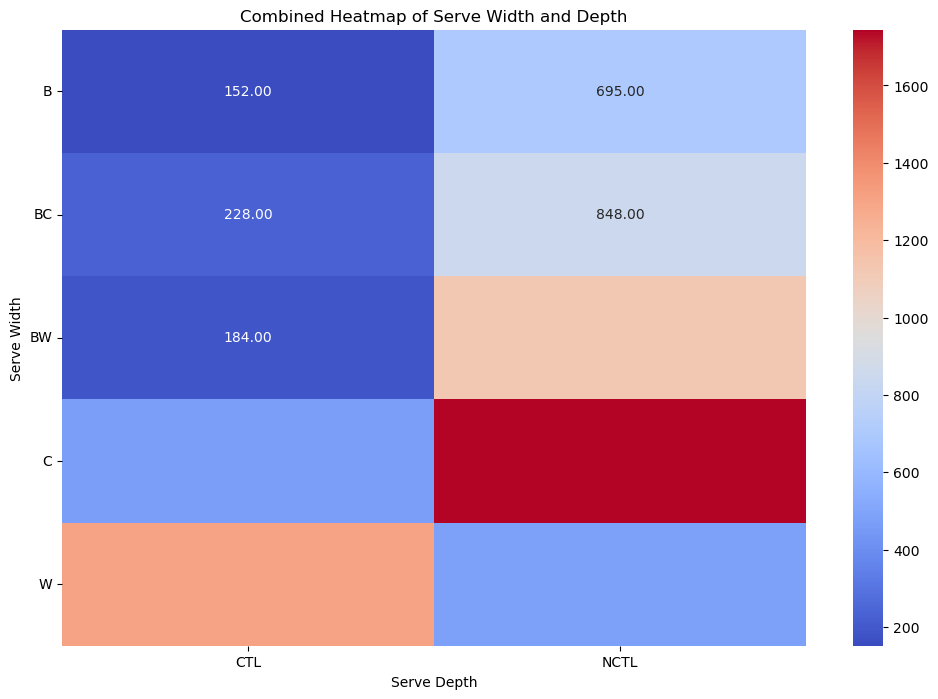

In [29]:
combined_freq = pd.crosstab(df['serve_width'], df['serve_depth']).astype(float)

plt.figure(figsize=(12, 8))

sns.heatmap(combined_freq, annot=True, cmap='coolwarm', fmt=".2f")

plt.title('Combined Heatmap of Serve Width and Depth')
plt.ylabel('Serve Width')
plt.xlabel('Serve Depth')
plt.yticks(rotation=0)

plt.savefig('image/heatmap.png', dpi=300)
plt.show()

In [30]:
combined_freq

serve_depth,CTL,NCTL
serve_width,,
B,152.0,695.0
BC,228.0,848.0
BW,184.0,1128.0
C,470.0,1744.0
W,1304.0,477.0


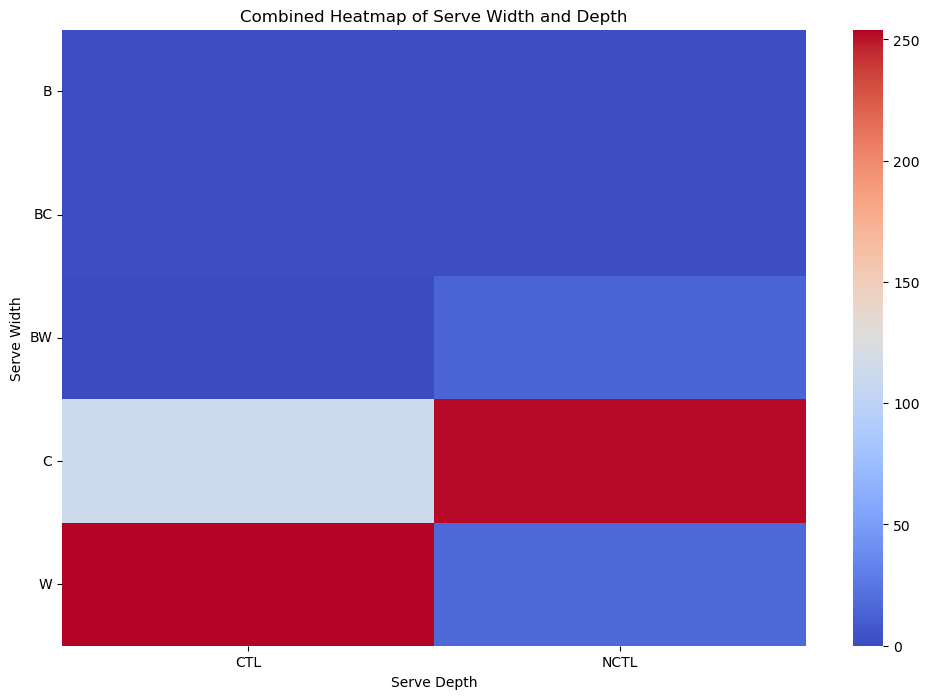

In [31]:
ace_df = df[(df['p1_ace'] == 1) | (df['p2_ace'] == 1)]

combined_freq = pd.crosstab(ace_df['serve_width'], ace_df['serve_depth']).astype(float)

plt.figure(figsize=(12, 8))

sns.heatmap(combined_freq, annot=False, cmap='coolwarm', fmt=".2f")

plt.title('Combined Heatmap of Serve Width and Depth')
plt.ylabel('Serve Width')
plt.xlabel('Serve Depth')
plt.yticks(rotation=0)

plt.savefig('image/ace heatmap.png', dpi=300)
plt.show()

In [32]:
combined_freq

serve_depth,CTL,NCTL
serve_width,,
B,1.0,1.0
BC,1.0,1.0
BW,0.0,14.0
C,113.0,253.0
W,254.0,16.0


/Users/lizongrun/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


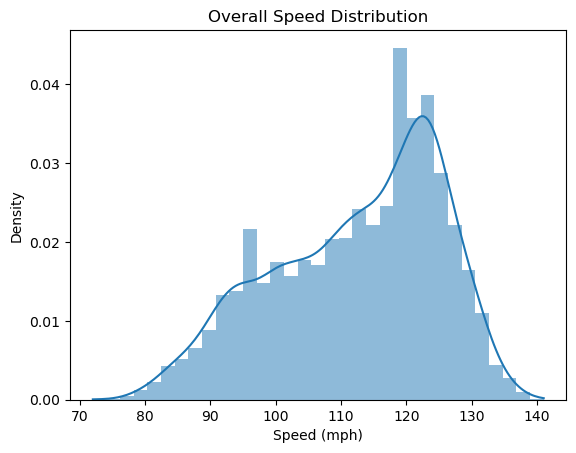

In [24]:
sns.histplot(df['speed_mph'], kde=True, stat="density", linewidth=0)
plt.title('Overall Speed Distribution')
plt.xlabel('Speed (mph)')
plt.ylabel('Density')
plt.savefig('image/speed distribution.png',dpi=300)
plt.show()

/Users/lizongrun/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


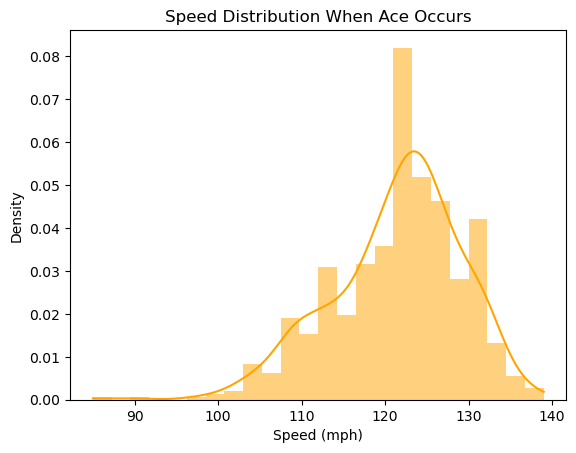

In [25]:
ace_df = df[(df['p1_ace'] == 1) | (df['p2_ace'] == 1)]

sns.histplot(ace_df['speed_mph'], kde=True, stat="density", color="orange", linewidth=0)
plt.title('Speed Distribution When Ace Occurs')
plt.xlabel('Speed (mph)')
plt.ylabel('Density')
plt.savefig('image/ace speed.png',dpi=300)
plt.show()